## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [16]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [19]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [20]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


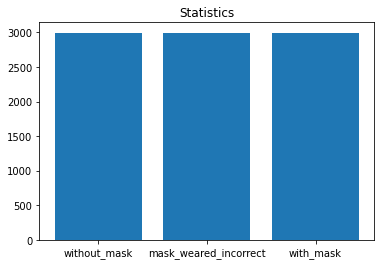

In [21]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

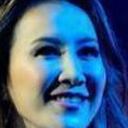

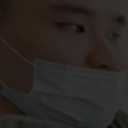

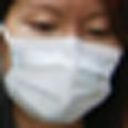

In [44]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  # lets say we want to show the image at index 7 in every class list
  img_show = this_path + '/' + im_count[7]
  img = cv2.imread(img_show)
  cv2_imshow(img)

# Your code

In [52]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
print(img.shape)
image_shape = img.shape

(128, 128, 3)


In [54]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
combined_images_shape = []
dict 
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count = os.listdir(dir)

  for i in im_count:
    img_show = this_path + '/' + i
    img = cv2.imread(img_show)
    combined_images_shape.append(img.shape) 

In [55]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it
from collections import Counter
items = Counter(combined_images_shape).keys()
if len(items)==1:
  print(f"The size of all the images is  :  {items}")
else:
  print(f"The size of all the images are not same")

The size of all the images is  :  dict_keys([(128, 128, 3)])


In [56]:
# Anything else you want to plot/experiment
print(combined_images_shape)

[(128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [29]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import keras
from keras.applications.mobilenet_v3 import MobileNetV3Small
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [25]:
# Choose and define base model
base_model=MobileNetV3Small(include_top=False, weights='imagenet')

4349952/4334752 [==============================] - 0s 0us/step


In [26]:
# Print base model summary and have a look at the layers
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                

In [27]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
base_model.trainable=False

In [31]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
Model=Sequential()
Model.add(base_model)
Model.add(GlobalAveragePooling2D())
Model.add(Dense(512, activation='relu'))
#Model.add(Dropout(0.2))
Model.add(Dense(128, activation='relu'))
Model.add(Dense(3, activation='softmax'))


In [ ]:
# Add the final output layer


In [32]:
# Print your model's summary
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, None, None, 576)  939120    
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 512)               295424    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,300,595
Trainable params: 361,475
Non-

In [33]:
# Compile you model (set the parameters like loss/optimizers/metrics)
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.01)
Model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [45]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data=ImageDataGenerator(validation_split=0.2)

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [46]:
# Your code

train_data=data.flow_from_directory('/content/drive/MyDrive/Mask_Dataset/',
                                   target_size=(224,224),
                                   color_mode='rgb',
                                   batch_size=64,
                                   class_mode='categorical')

test_data=data.flow_from_directory('/content/drive/MyDrive/Mask_Dataset/',
                                  target_size=(224,224),
                                  color_mode='rgb',
                                  batch_size=64,
                                  class_mode='categorical',
                                  subset='validation')


Found 8982 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [47]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model_history=Model.fit(train_data, validation_data=test_data, epochs=20, callbacks=[mc])

Epoch 1/20
141/141 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9863
Epoch 1: val_accuracy improved from -inf to 0.99387, saving model to best_model.h5
141/141 [==============================] - 133s 919ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0221 - val_accuracy: 0.9939
Epoch 2/20
141/141 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9876
Epoch 2: val_accuracy improved from 0.99387 to 0.99554, saving model to best_model.h5
141/141 [==============================] - 30s 210ms/step - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.0175 - val_accuracy: 0.9955
Epoch 3/20
141/141 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9890
Epoch 3: val_accuracy did not improve from 0.99554
141/141 [==============================] - 29s 209ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0341 - val_accuracy: 0.9894
Epoch 4/20
141/141 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 

### Evaluate the performance

In [ ]:
# Plot training & validation loss/accuracy values

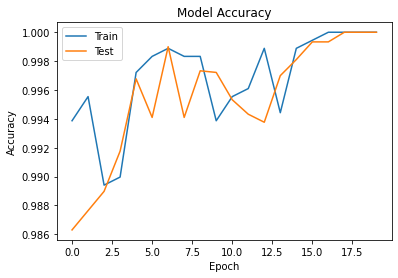

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# print classification report
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

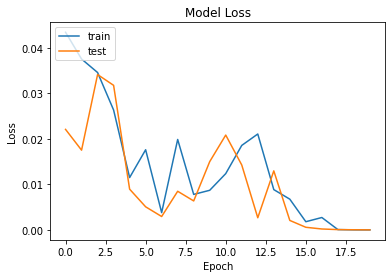

In [49]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
predictions=Model.predict(test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


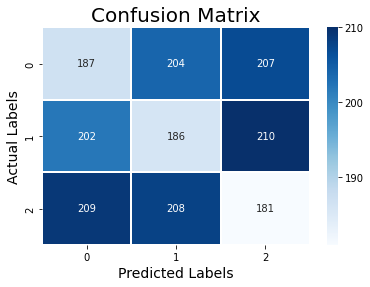

In [51]:
import seaborn as sns

Y_pred = Model.predict_generator(test_data, 1794 // 64+1)
y_pred = np.argmax(Y_pred, axis=1)
cm=confusion_matrix(test_data.classes, y_pred)
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
target_names = ['mask_weared_incorrect', 'with_mask', 'without_mask']
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.rcParams.update({'font.size': 22})
plt.savefig('Model_Confusion_Matrix.png')
plt.show()

In [57]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)
print(classification_report(test_data.classes, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

mask_weared_incorrect       0.31      0.31      0.31       598
            with_mask       0.31      0.31      0.31       598
         without_mask       0.30      0.30      0.30       598

             accuracy                           0.31      1794
            macro avg       0.31      0.31      0.31      1794
         weighted avg       0.31      0.31      0.31      1794

